In [1]:
import pandas as pd
import numpy as np
from numba import jit, cuda 

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#pip install keras

In [3]:
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [22]:

#from numba import jit, cuda 
#import numpy as np 
## to measure exec time 
#from timeit import default_timer as timer    
  
# normal function to run on cpu 
#def func(a):                                 
    #for i in range(10000000): 
        #a[i]+= 1      
  
## function optimized to run on gpu  
#@jit(target ="cuda")                          
#def func2(a): 
    #for i in range(10000000): 
        #a[i]+= 1
#if __name__=="__main__": 
    #n = 10000000                            
    #a = np.ones(n, dtype = np.float64) 
    #b = np.ones(n, dtype = np.float32) 
      
    #start = timer() 
    #func(a) 
    #print("without GPU:", timer()-start)     
      
    #start = timer() 
    #func2(a) 
    #print("with GPU:", timer()-start) 

In [90]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense,Input
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPool1D,Bidirectional
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras import initializers, regularizers, constraints, optimizers, layers
import sys, os, re, csv, codecs

import matplotlib.pyplot as plt

In [75]:
embed_size = 50 # how big is each word vector
max_features = 20000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a comment to use

In [24]:

rel_data = pd.read_csv('trainingdata.csv', encoding = "ISO-8859-1")
rel_data

,Unnamed: 0,Sentence,Growth,Inflation,Cad,Money,Fiscal,Other
0,0,Profits of listed Indian companies have remain...,0,0,0,0,0,0
1,1,"On the other hand, nominal gross domestic prod...",0,0,0,0,0,0
2,2,The upshot is corporate earnings expressed as ...,0,0,0,0,0,0
3,3,Corporate profit as a percentage of GDP for th...,0,0,0,0,0,0
4,4,"In fact, the measure has consistently declined...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
220848,220848,"Sathvik Vishwanath, CEO and cofounder, Unocoin...",0,0,1,0,0,0
220849,220849,Just by restricting the outflow of funds to i...,0,0,0,0,0,0
220850,220850,"Varun Deshpande, cofounder of Nuo Network, a p...",0,0,0,0,0,0
220851,220851,He said since India was Facebooks biggest mar...,0,0,0,0,0,0


In [25]:
rel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220853 entries, 0 to 220852
Data columns (total 8 columns):
Unnamed: 0    220853 non-null int64
Sentence      220853 non-null object
Growth        220853 non-null int64
Inflation     220853 non-null int64
Cad           220853 non-null int64
Money         220853 non-null int64
Fiscal        220853 non-null int64
Other         220853 non-null int64
dtypes: int64(7), object(1)
memory usage: 13.5+ MB


In [28]:
rel_data_test=rel_data[(rel_data['Growth']==0) & (rel_data['Inflation']==0) & (rel_data['Cad']==0) & (rel_data['Money']==0) & (rel_data['Fiscal']==0) & (rel_data['Other']==0)]
rel_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189494 entries, 0 to 220852
Data columns (total 8 columns):
Unnamed: 0    189494 non-null int64
Sentence      189494 non-null object
Growth        189494 non-null int64
Inflation     189494 non-null int64
Cad           189494 non-null int64
Money         189494 non-null int64
Fiscal        189494 non-null int64
Other         189494 non-null int64
dtypes: int64(7), object(1)
memory usage: 13.0+ MB


In [29]:
rel_data_train=rel_data[(rel_data['Growth']==1) | (rel_data['Inflation']==1) | (rel_data['Cad']==1) | (rel_data['Money']==1) | (rel_data['Fiscal']==1) | (rel_data['Other']==1)]
rel_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31359 entries, 7 to 220848
Data columns (total 8 columns):
Unnamed: 0    31359 non-null int64
Sentence      31359 non-null object
Growth        31359 non-null int64
Inflation     31359 non-null int64
Cad           31359 non-null int64
Money         31359 non-null int64
Fiscal        31359 non-null int64
Other         31359 non-null int64
dtypes: int64(7), object(1)
memory usage: 2.2+ MB


In [139]:
real_data_train.to_csv('train_copy.csv', index=False)

NameError: name 'real_data_train' is not defined

In [77]:
print(rel_data_train.shape)
rel_data_train.head()

(31359, 8)


,Unnamed: 0,Sentence,Growth,Inflation,Cad,Money,Fiscal,Other
7,7,"In addition to weak demand, the sharp fall in ...",0,1,0,0,0,0
9,9,There could be improvement in the days to com...,1,0,0,0,0,0
45,45,The chart shows that average inflation expecta...,0,1,0,0,0,0
47,47,add_main_imageThe years of low inflation from ...,0,1,0,0,0,0
48,48,"Conversely, the years of high inflation betwee...",0,1,0,0,0,0


In [137]:
rel_data_train['Other'].value_counts()

0    30081
1     1278
Name: Other, dtype: int64

In [85]:
EMBEDDING_FILE='glove.6B.50d.txt'

In [78]:
train = rel_data_train
test = rel_data

In [79]:
list_sentences_train = train["Sentence"].fillna("_na_").values
list_classes = ["Growth", "Inflation", "Cad", "Money", "Fiscal", "Other"]
y = train[list_classes].values
list_sentences_test = test["Sentence"].fillna("_na_").values

In [80]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)


In [86]:
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(EMBEDDING_FILE,encoding="utf8"))

In [87]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
emb_mean,emb_std

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


(0.020940498, 0.6441043)

In [88]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [106]:
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
history=model.fit(X_t, y, batch_size=32, epochs=10, validation_split=0.3);


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 21951 samples, validate on 9408 samples
Epoch 1/10
21951/21951 [==============================] - 227s 10ms/step - loss: 0.2214 - accuracy: 0.9111 - val_loss: 0.0795 - val_accuracy: 0.9734
Epoch 2/10
21951/21951 [==============================] - 220s 10ms/step - loss: 0.0551 - accuracy: 0.9821 - val_loss: 0.0442 - val_accuracy: 0.9849
Epoch 3/10
21951/21951 [==============================] - 221s 10ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0315 - val_accuracy: 0.9892
Epoch 4/10
21951/21951 [==============================] - 224s 10ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0283 - val_accuracy: 0.9910
Epoch 5/10
21951/21951 [==============================] - 220s 10ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0238 - val_accuracy: 0.9925
Epoch 6/10
21951/21951 [==============================] - 228s 10ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0214 - val_accuracy: 0.9934
Epoch 7/10
21951/21951 [==============================] -

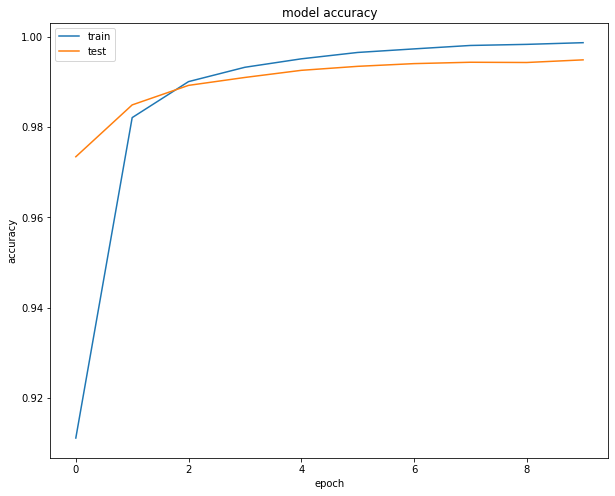

In [116]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

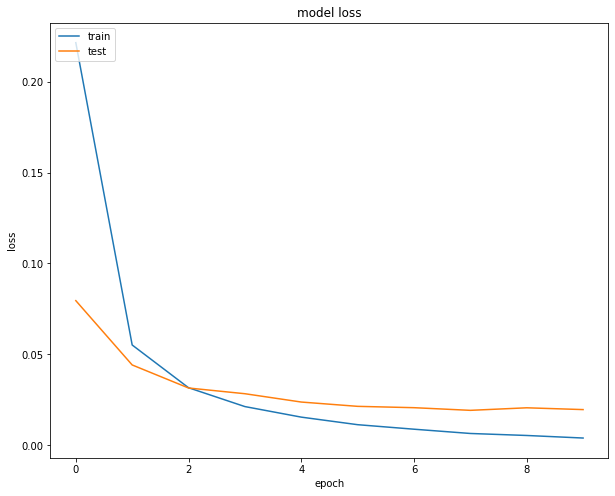

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [124]:
y_test = model.predict([X_te], batch_size=1024, verbose=1)


In [120]:
sample_submission = pd.read_csv('submission.csv', encoding = "ISO-8859-1")


In [121]:
sample_submission[list_classes] = y_test
sample_submission.to_csv('submission_output.csv', index=False)

In [123]:
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 100, 50)           1000000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 100)          40400     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 306 

In [127]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220853 entries, 0 to 220852
Data columns (total 7 columns):
Sentence     220853 non-null object
Growth       220853 non-null float64
Inflation    220853 non-null float64
Cad          220853 non-null float64
Money        220853 non-null float64
Fiscal       220853 non-null float64
Other        220853 non-null float64
dtypes: float64(6), object(1)
memory usage: 11.8+ MB


In [129]:
sample_submission[list_classes].head(50)

,Growth,Inflation,Cad,Money,Fiscal,Other
0,0.320746,0.002086,0.002929,0.000452,5.468115e-04,0.000670
1,0.251860,0.085288,0.000618,0.001354,5.426285e-04,0.000028
2,0.789992,0.025004,0.001632,0.002925,1.698705e-03,0.000095
3,0.999486,0.000022,0.000121,0.000211,2.087124e-05,0.000028
4,0.549756,0.262251,0.049482,0.002159,2.781866e-04,0.000051
5,0.816448,0.016276,0.046647,0.001035,7.516440e-04,0.000204
6,0.065341,0.000159,0.010214,0.001305,1.066412e-03,0.000616
7,0.001056,0.999989,0.000013,0.000010,6.998830e-06,0.000002
8,0.025409,0.006867,0.038031,0.000047,4.926763e-01,0.000137
9,0.999999,0.000068,0.000058,0.000112,4.889674e-07,0.000102


In [130]:
sample_submission_1=sample_submission.copy(deep=True)

In [131]:
sample_submission_1['Other'].head()

0    0.000670
1    0.000028
2    0.000095
3    0.000028
4    0.000051
Name: Other, dtype: float64

In [134]:
sample_submission_1[list_classes].head(50)

,Growth,Inflation,Cad,Money,Fiscal,Other
0,0.320746,0.002086,0.002929,0.000452,5.468115e-04,0.000670
1,0.251860,0.085288,0.000618,0.001354,5.426285e-04,0.000028
2,0.789992,0.025004,0.001632,0.002925,1.698705e-03,0.000095
3,0.999486,0.000022,0.000121,0.000211,2.087124e-05,0.000028
4,0.549756,0.262251,0.049482,0.002159,2.781866e-04,0.000051
5,0.816448,0.016276,0.046647,0.001035,7.516440e-04,0.000204
6,0.065341,0.000159,0.010214,0.001305,1.066412e-03,0.000616
7,0.001056,0.999989,0.000013,0.000010,6.998830e-06,0.000002
8,0.025409,0.006867,0.038031,0.000047,4.926763e-01,0.000137
9,0.999999,0.000068,0.000058,0.000112,4.889674e-07,0.000102
